In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.ticker as plticker
import seaborn as sns
import os
from datetime import timedelta, datetime

mpl.rcParams['figure.dpi'] = 100

In [2]:
os.chdir("C:\\Users\\bcher\\Documents\\Studium\\Nova\\2020 - 2020 WS\\Data Visualization\\Project\\Airbnb\\")
os.getcwd()

'C:\\Users\\bcher\\Documents\\Studium\\Nova\\2020 - 2020 WS\\Data Visualization\\Project\\Airbnb'

In [3]:
df_2015 = pd.read_csv("2015 - 05\listings.csv")
df_2016 = pd.read_csv("2016 - 05\listings.csv")
df_2017 = pd.read_csv("2017 - 05\listings.csv")
df_2018 = pd.read_csv("2018 - 05\listings.csv")
df_2019 = pd.read_csv("2019 - 05\listings.csv")
df_2020 = pd.read_csv("2020 - 05\listings.csv")

df_rent = pd.read_csv("Rent_SF.csv", sep=";")

rents=pd.read_csv('Zillow_data.csv')

In [4]:
df_2015["year"] = 2015
df_2016["year"] = 2016
df_2017["year"] = 2017
df_2018["year"] = 2018
df_2019["year"] = 2019
df_2020["year"] = 2020

df2 = pd.concat([df_2015, df_2016, df_2017, df_2018, df_2019, df_2020])

df3 = df2.groupby("year")["year"].size().reset_index(name="listings")

df_rent["Month"]=pd.to_datetime(df_rent["Month"], format = "%m-%Y")
df_rent.set_index("Month", inplace = True)

In [5]:
SF_rents=rents.loc[rents['MsaName']=='San Francisco, CA']

# Transforming the rental dataset to obtain averages per month
SF=SF_rents.drop(['RegionID','RegionName','SizeRank','MsaName'],axis=1)
SF.columns= pd.to_datetime(SF.columns)
average_per_month=pd.DataFrame(SF.mean(axis=0)).rename(columns={0:'MonthlyAverageRents'})

# Creating a pivot table to separate the different years -same output as the previous piece of code but in a different presentation
pv = pd.pivot_table(average_per_month, index=average_per_month.index.month, columns=average_per_month.index.year,
                    values='MonthlyAverageRents', aggfunc='sum')
pv.index.name='Month'

In [6]:
average_per_month = average_per_month[:"2019-12-01"]
average_per_month

,MonthlyAverageRents
2014-01-01,2269.428571
2014-02-01,2295.441176
2014-03-01,2344.969697
2014-04-01,2325.217391
2014-05-01,2344.900000
...,...
2019-08-01,3126.819444
2019-09-01,3143.849315
2019-10-01,3133.611111
2019-11-01,3132.527778


In [52]:
df_rent_19 = df_rent["2015-01-01":"2019-12-01"]
df_rent_19.index.rename("Year",inplace=True)
df_rent_19 = pd.concat([df_rent_19, average_per_month], axis=1).reindex(df_rent_19.index)
df_rent_19.drop("AllBeds", axis = 1, inplace = True)
df_rent_19.columns = ["2 Bedrooms", "3 Bedrooms", "Monthly Average"]
df_r_mean_19 = df_rent_19.groupby(df_rent_19.index.map(lambda t: t.year)).mean()
df_r_mean_19.index.rename("Year",inplace=True)

# The market for long-term rentals in San Francisco

In the media a large offer of AirBnB apartments is often associated with rising prices for long-term rentals. In this section we first look at the rental market exclusively for long-term apartments that are not rented through AirBnB and outline the price development. Then we compare the monthly prices for long-term AirBnBs with the average monthly prices for long-term apartments. 

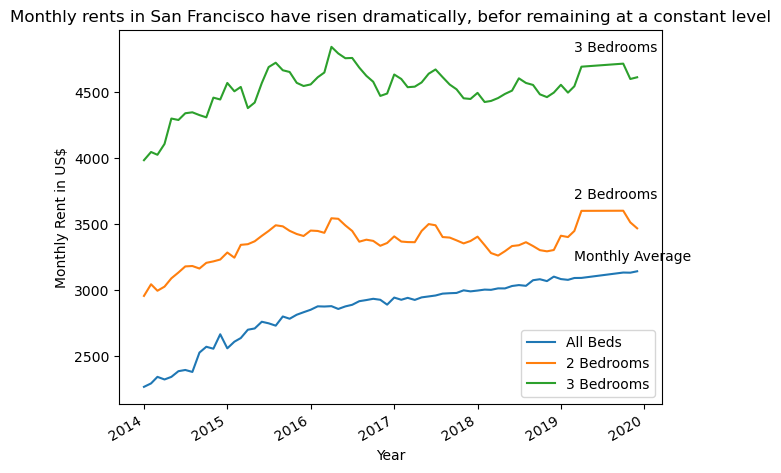

In [37]:
fig,sp = plt.subplots(1,1,figsize = (7,5.5));
df_rent_19.plot(y="Monthly Average", ax=sp , label="All Beds")
df_rent_19.plot(y="2 Bedrooms",ax = sp, label = "2 Bedrooms")
df_rent_19.plot(y="3 Bedrooms", ax = sp, label = "3 Bedrooms")
plt.ylabel("Monthly Rent in US$")
plt.title("Monthly rents in San Francisco have risen dramatically, befor remaining at a constant level")
last_month = df_rent_19.last("6M")
for i in ["2 Bedrooms","3 Bedrooms","Monthly Average"]:
    plt.text("2019-03-01",last_month[i][0]+90, i)



The graphs show the monthly prices for long-term rentals in the years from 2011 to the end of 2019 in San Francisco. It can be seen that the rents for one and two bedroom apartments have increased significantly in the years 2011 to 2016. In the following years until the end of 2019, the rent level has remained more or less the same. 

In [57]:
df2_long = df2[df2["minimum_nights"]>29]
df2_long["prices_m"] = 30*df2_long["price"]
df2_lm =  df2_long.groupby("year").mean()
df2_lm = df2_lm[:5]

<ipython-input-57-f3cb0c58acc9>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2_long["prices_m"] = 30*df2_long["price"]


# What influence does the market for AirBnB apartments have on the rental market?

We have already worked out that the market for AirBnB apartments in San Francisco has grown strongly between 2015 and 2019. With the exception of a slump in 2018, the number of apartments offered through the website has been increasing steadily. 
In order to analyze the impact of AirBnB on the rental market, we have limited ourselves to AirBnB apartments with a minimum rental period of more than 30 days, as we believe that they are mainly in competition with the traditional rental market. 
From the remaining AirBnB apartments we have calculated the annual average of the monthly rents and compared them with the monthly long-term rents.


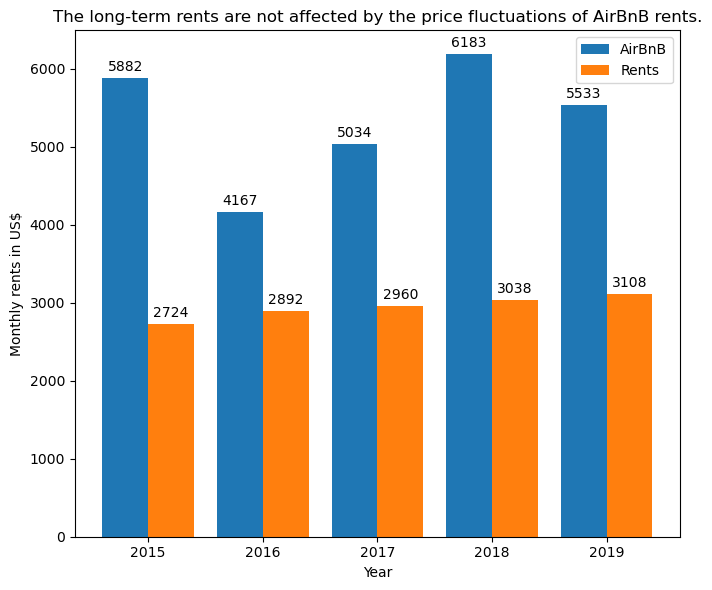

In [56]:
x = np.arange(len(df_r_mean_19.index))
w = 0.40

fig, ax = plt.subplots(figsize = (7,6))
AirBnB = ax.bar(x - w/2, df2_lm["prices_m"].astype(int) , w, label="AirBnB")
Rents = ax.bar(x + w/2, df_r_mean_19["Monthly Average"].astype(int), w, label="Rents")

ax.set_ylabel("Monthly rents in US$")
ax.set_xlabel("Year")
ax.set_title("The long-term rents are not affected by the price fluctuations of AirBnB rents.")
ax.set_xticks(x)
ax.set_xticklabels(df_r_mean_19.index)
ax.legend()

for p in AirBnB:
    height = p.get_height()
    ax.annotate('{}'.format(height),
        xy=(p.get_x() + p.get_width() / 2, height),
        xytext=(0, 3),
        textcoords="offset points",
        ha='center', va='bottom')
for p in Rents:
    height = p.get_height()
    ax.annotate('{}'.format(height),
        xy=(p.get_x() + p.get_width() / 2, height),
        xytext=(0, 3),
        textcoords="offset points",
        ha='center', va='bottom')

fig.tight_layout()
plt.show()

The bar chart shows that the average monthly AirBnB rents are very volatile in the years from 2015 to 2019. The prices on the classic rental market are very constant during this period and are not affected by the price fluctuations of AirBnB apartments. 